<a href="https://colab.research.google.com/github/andrewfeikema/alpha-zero-general/blob/master/Othello_Play_Trial_using_AlphaZero_General.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mastering Othello Without Human Knowledge**

Can a small-scale model perform well at a simple board game without explicit provision of rules or examples? This project is inspired by advancements in general reinforcement learning demonstrated in the Go Game by Google's AlphaZero Model. However, the state space for Go is greater than the number of atoms in the observable universe, so we need a setting like 8x8 Othello with rapid board analysis and a limited set of legal moves.


## **The reinforcement approach**

Like AlphaZero, this model plays against itself to refine its approach. One major limitation to this approach is that it cannot acquire common strategies from natural gameplay, so the model's policy must balance exploration and exploitation to develop strategy. This is the advantage of the Monte Carlo method.

## **Setup, install dependencies**

The training process takes advantage of existing implementations for Othello's game logic, gameplay, and the tree search algorithm.

In [1]:
# Clone repo and install requirements

!git clone https://github.com/andrewfeikema/alpha-zero-general.git

Cloning into 'alpha-zero-general'...
remote: Enumerating objects: 1160, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 1160 (delta 47), reused 95 (delta 39), pack-reused 1051
Receiving objects: 100% (1160/1160), 992.12 MiB | 23.00 MiB/s, done.
Resolving deltas: 100% (623/623), done.
Checking out files: 100% (62/62), done.


In [2]:
%cd '/content/alpha-zero-general'

/content/alpha-zero-general


In [3]:
!git checkout -t origin/master

fatal: A branch named 'master' already exists.


In [4]:
!pip install -r docker/requirements.txt

     |████████████████████████████████| 51kB 3.7MB/s 
     |████████████████████████████████| 2.0MB 9.5MB/s 
     |████████████████████████████████| 450kB 29.7MB/s 
     |████████████████████████████████| 31.2MB 163kB/s 
     |████████████████████████████████| 9.5MB 26.2MB/s 
     |████████████████████████████████| 25.3MB 109kB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 92kB 10.1MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
  Created wheel for torchfile: filename=torchfile-0.1.0-cp37-none-any.whl size=5713 sha256=0daa216fd34ad91e1416b6e693f95017d6fd339d56660e1d771bda0564d874a9
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
  Created wheel for visdom: filename=visdom

# **Instantiate players**

In [5]:
import os
import numpy as np

import Arena
from MCTS import MCTS
from othello.OthelloGame import OthelloGame
from othello.OthelloPlayers import HumanOthelloPlayer, RandomPlayer, GreedyOthelloPlayer
from othello.pytorch.NNet import NNetWrapper

from utils import dotdict

In [6]:
game = OthelloGame(n=8)

In [7]:
grp1 = GreedyOthelloPlayer(game).play

In [8]:
numMCTSSims = 50

In [14]:
nnet1 = NNetWrapper(game)
nnet1.load_checkpoint(os.path.join('pretrained_models', 'othello', 'pytorch', '5-pm-checkpoints'), 'best.pth.tar')
args1 = dotdict({'numMCTSSims': numMCTSSims, 'cpuct': 1.0})
mcts1 = MCTS(game, nnet1, args1)
alphazero1 = lambda x: np.argmax(mcts1.getActionProb(x, temp=0))

# **Play *Greedy Random* vs *AlphaZero***

In playing 50 games, AlphaZero is considerably slower than the greedy approach. 50 games take roughly 5 minutes.

In [10]:
# Play Greedy Random vs AlphaZero
player1 = grp1
player2 = alphazero1
arena = Arena.Arena(player1, player2, game, display=OthelloGame.display)
%time oneWon, twoWon, draws = arena.playGames(50, verbose=False)
print("\nGreedy Random won {} games, Alpha Zero won {} games".format(oneWon, twoWon))

Arena.playGames (2): 100%|██████████| 25/25 [02:08<00:00,  5.14s/it]

CPU times: user 4min 27s, sys: 1.66 s, total: 4min 28s
Wall time: 4min 26s

Greedy Random won 5 games, Alpha Zero won 45 games


# **Tracking progress:**
Checkpoint models against a greedy player

In [14]:
# Show file locations of checkpoint models

models3 = ['checkpoint_1.pth.tar', 'checkpoint_2.pth.tar', 'checkpoint_3.pth.tar', 'checkpoint_5.pth.tar', 'checkpoint_8.pth.tar', 'checkpoint_10.pth.tar' ]
models5 = ['checkpoint_1.pth.tar', 'checkpoint_2.pth.tar', 'checkpoint_3.pth.tar', 'checkpoint_4.pth.tar', 'checkpoint_5.pth.tar', 'checkpoint_6.pth.tar', 'checkpoint_7.pth.tar', 'checkpoint_8.pth.tar', 'checkpoint_10.pth.tar' ]
all_models = [(models3, '3-pm-checkpoints'), (models5, '5-pm-checkpoints')]
all_models

[(['checkpoint_1.pth.tar',
   'checkpoint_2.pth.tar',
   'checkpoint_3.pth.tar',
   'checkpoint_5.pth.tar',
   'checkpoint_8.pth.tar',
   'checkpoint_10.pth.tar'],
  '3-pm-checkpoints'),
 (['checkpoint_1.pth.tar',
   'checkpoint_2.pth.tar',
   'checkpoint_3.pth.tar',
   'checkpoint_4.pth.tar',
   'checkpoint_5.pth.tar',
   'checkpoint_6.pth.tar',
   'checkpoint_7.pth.tar',
   'checkpoint_8.pth.tar',
   'checkpoint_10.pth.tar'],
  '5-pm-checkpoints')]

In [15]:
args1 = dotdict({'numMCTSSims': numMCTSSims, 'cpuct': 1.0})
player1 = grp1


for set in all_models:
  for checkpoint in set[0]:
    nnetwrapper = NNetWrapper(game)
    nnetwrapper.load_checkpoint(os.path.join('pretrained_models', 'othello', 'pytorch', set[1]), checkpoint)
    mctstree = MCTS(game, nnetwrapper, args1)
    alphazero1 = lambda x: np.argmax(mctstree.getActionProb(x, temp=0))
    player2 = alphazero1
    arena = Arena.Arena(player1, player2, game, display=OthelloGame.display)
    %time oneWon, twoWon, draws = arena.playGames(50, verbose=False)
    print("\nGreedy Random won {} games, Alpha Zero won {} games".format(oneWon, twoWon))

Arena.playGames (2): 100%|██████████| 25/25 [01:34<00:00,  3.76s/it]


CPU times: user 3min 5s, sys: 734 ms, total: 3min 5s
Wall time: 3min 5s

Greedy Random won 26 games, Alpha Zero won 24 games


Arena.playGames (2): 100%|██████████| 25/25 [01:36<00:00,  3.86s/it]


CPU times: user 3min 13s, sys: 736 ms, total: 3min 14s
Wall time: 3min 13s

Greedy Random won 12 games, Alpha Zero won 38 games


Arena.playGames (2): 100%|██████████| 25/25 [01:40<00:00,  4.03s/it]


CPU times: user 3min 20s, sys: 847 ms, total: 3min 21s
Wall time: 3min 20s

Greedy Random won 18 games, Alpha Zero won 32 games


Arena.playGames (2): 100%|██████████| 25/25 [01:36<00:00,  3.86s/it]


CPU times: user 3min 18s, sys: 857 ms, total: 3min 19s
Wall time: 3min 18s

Greedy Random won 7 games, Alpha Zero won 43 games


Arena.playGames (2): 100%|██████████| 25/25 [01:42<00:00,  4.09s/it]


CPU times: user 3min 24s, sys: 864 ms, total: 3min 25s
Wall time: 3min 24s

Greedy Random won 9 games, Alpha Zero won 41 games


Arena.playGames (2): 100%|██████████| 25/25 [01:39<00:00,  4.00s/it]


CPU times: user 3min 23s, sys: 861 ms, total: 3min 24s
Wall time: 3min 23s

Greedy Random won 5 games, Alpha Zero won 45 games


Arena.playGames (2): 100%|██████████| 25/25 [01:32<00:00,  3.70s/it]


CPU times: user 3min 2s, sys: 619 ms, total: 3min 2s
Wall time: 3min 2s

Greedy Random won 24 games, Alpha Zero won 26 games


Arena.playGames (2): 100%|██████████| 25/25 [01:35<00:00,  3.84s/it]


CPU times: user 3min 11s, sys: 710 ms, total: 3min 12s
Wall time: 3min 11s

Greedy Random won 9 games, Alpha Zero won 41 games


Arena.playGames (2): 100%|██████████| 25/25 [01:37<00:00,  3.91s/it]


CPU times: user 3min 11s, sys: 732 ms, total: 3min 12s
Wall time: 3min 11s

Greedy Random won 17 games, Alpha Zero won 33 games


Arena.playGames (2): 100%|██████████| 25/25 [01:39<00:00,  3.99s/it]


CPU times: user 3min 18s, sys: 860 ms, total: 3min 19s
Wall time: 3min 18s

Greedy Random won 7 games, Alpha Zero won 43 games


Arena.playGames (2): 100%|██████████| 25/25 [01:37<00:00,  3.90s/it]


CPU times: user 3min 25s, sys: 869 ms, total: 3min 26s
Wall time: 3min 25s

Greedy Random won 7 games, Alpha Zero won 43 games


Arena.playGames (2): 100%|██████████| 25/25 [01:41<00:00,  4.08s/it]


CPU times: user 3min 25s, sys: 983 ms, total: 3min 26s
Wall time: 3min 25s

Greedy Random won 5 games, Alpha Zero won 45 games


Arena.playGames (2): 100%|██████████| 25/25 [01:50<00:00,  4.43s/it]


CPU times: user 3min 38s, sys: 1.11 s, total: 3min 39s
Wall time: 3min 37s

Greedy Random won 4 games, Alpha Zero won 46 games


Arena.playGames (2): 100%|██████████| 25/25 [01:41<00:00,  4.07s/it]


CPU times: user 3min 25s, sys: 795 ms, total: 3min 25s
Wall time: 3min 24s

Greedy Random won 9 games, Alpha Zero won 41 games


Arena.playGames (2): 100%|██████████| 25/25 [01:37<00:00,  3.91s/it]

CPU times: user 3min 25s, sys: 837 ms, total: 3min 26s
Wall time: 3min 24s

Greedy Random won 5 games, Alpha Zero won 45 games


#### **How has the model evolved?**

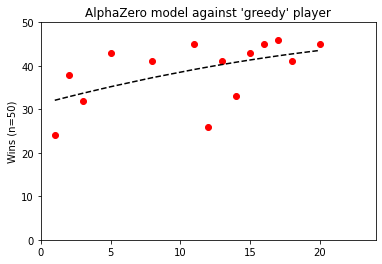

In [30]:
import matplotlib.pyplot as plt
#note: neglected to export win counts from above cell for analysis- had to enter manually
x = [1,2,3,5,8,11,12,13,14,15,16,17,18,20]
y = [24,38,32,43,41,45,26,41,33,43,45,46,41,45]
coef = np.polyfit(x,y,2)
plt.plot(x, y, 'ro', x, np.poly1d(coef)(x), '--k')
plt.axis([0,24,0, 50])
plt.title('AlphaZero model against \'greedy\' player')
plt.ylabel('Wins (n=50)')
plt.show()

The model appears to initially make quick progress after successive iterations. After 10 iterations of 10 epochs of self-play, there is still room for improvement in overcoming the 'greedy' strategy.

# **Play against *AlphaZero***

You can try playing against AlphaZero.
You will play one game as the second player and one as the first player.


In [ ]:
# Play Greedy Random vs AlphaZero
hp1 = HumanOthelloPlayer(game).play
player1 = hp1
player2 = alphazero1
arena = Arena.Arena(player1, player2, game, display=OthelloGame.display)
oneWon, twoWon, draws = arena.playGames(2, verbose=True)
print("You won {} games, Alpha Zero won {} games".format(oneWon, twoWon))

# **Exploring the model**

#### **Uncovering shapes and connections**

Given a board state, the MCTS algorithm provides a policy, a set of likelihoods of preference for each action. 